# **DIABETES DATASET: K-MODES CLUSTERING**

<span style="font-size: 20px;">Created by *Oleksiy Danilin*</span>

<span style="font-size: 16px;">In this book, we run a k-modes model based on a modified fully-binary diabetes dataset. The fact that all the variables are binary has determined the choice of k-modes approach, as opposite to k-means (categorical variables) and k-prototypes (mixed data types).

### **Model** 

In [4]:
# Install kmodes if you haven't already
!pip install kmodes

import pandas as pd
from kmodes.kmodes import KModes

# Load your dataset
df = pd.read_csv('diabetes_ONLY_binary.csv')

# Select binary columns for clustering
binary_columns = [
    'Diabetes_prevalence', 'Sex', 'PoorGenHlth', 'PoorPhysHlth', 'PoorMentHlth', 
    'AnyHealthcare', 'HighBMI', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 
    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'DiffWalk', 'Fruits', 
    'Veggies', 'HvyAlcoholConsump', 'HighAge', 'LowIncome', 'NoDocbcCost', 
    'HSchoolEducation', 'CollegeEducation'
]

# Fit the K-modes model
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(df[binary_columns])

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Display the clustered dataframe
print(df.head())

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24507, cost: 326106.0
Run 1, iteration: 2/100, moves: 14687, cost: 314981.0
Run 1, iteration: 3/100, moves: 1073, cost: 314981.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 14810, cost: 343519.0
Run 2, iteration: 2/100, moves: 2986, cost: 343519.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 17540, cost: 325065.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 26764, cost: 346423.0
Run 4, iteration: 2/100, moves: 11250, cost: 342567.0
Run 4, iteration: 3/100, moves: 1018, cost: 342567.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 19254, cost: 344970.0
Best run was number 1
   Diabetes_prevalence  Sex  PoorGenHlth 

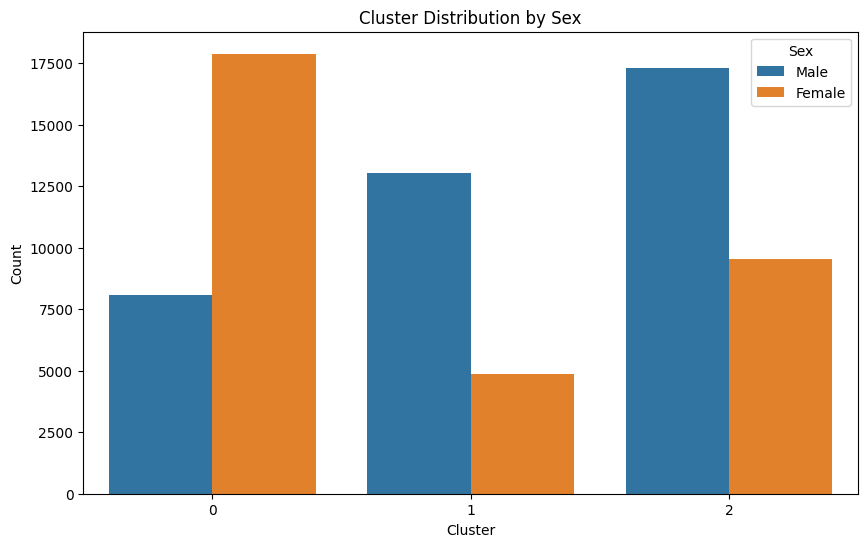

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Sex')
plt.title('Cluster Distribution by Sex')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.show()

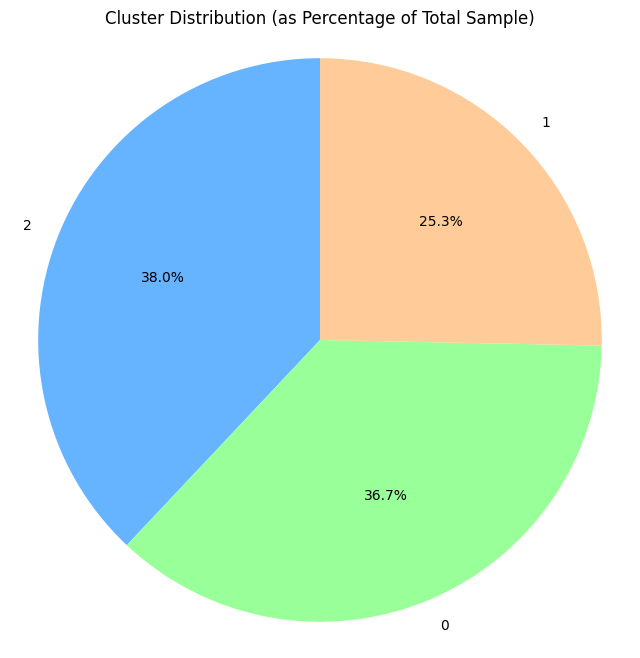

In [8]:
import matplotlib.pyplot as plt

# Calculate the total sample size
total_sample_size = len(df)

# Calculate the count of each cluster
cluster_counts = df['Cluster'].value_counts()

# Calculate the proportion of each cluster
cluster_proportions = cluster_counts / total_sample_size * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_proportions, labels=cluster_proportions.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Cluster Distribution (as Percentage of Total Sample)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [9]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         Diabetes_prevalence       Sex  PoorGenHlth  PoorPhysHlth  \
Cluster                                                             
0                   0.725780  0.689094     0.036917      0.308324   
1                   0.742330  0.272534     0.254987      0.861414   
2                   0.120237  0.355608     0.010690      0.274183   

         PoorMentHlth  AnyHealthcare   HighBMI    HighBP  HighChol  CholCheck  \
Cluster                                                                         
0            0.156031       0.972524  0.854836  0.819692  0.739345   0.992486   
1            0.632132       0.945851  0.861190  0.778150  0.708466   0.984577   
2            0.269676       0.944053  0.669907  0.172682  0.197378   0.952397   

         ...  PhysActivity  DiffWalk    Fruits   Veggies  HvyAlcoholConsump  \
Cluster  ...                                                                  
0        ...      0.789518  0.138690  0.611407  0.788825           0.036570   
1        ..

### **Clusters' Description**

**Cluster 0:**
Diabetes Prevalence: 72.6% of individuals in this cluster have diabetes (or prediabetes).
Sex: 68.9% of this cluster is female (since 1 represents female in your dataset).
Poor General Health: Only 3.7% of individuals report poor general health, which is relatively low.
Physical and Mental Health: 30.8% report poor physical health, and 15.6% report poor mental health.
Healthcare and Conditions:
Almost all (97.3%) have healthcare access.
85.5% have a high BMI, and 81.9% have high blood pressure.
73.9% have high cholesterol, and 99.2% have had a cholesterol check.
Other Health Factors: This cluster tends to be more physically active (78.9%), eat fruits and veggies regularly, and 79.8% are older individuals (high age).
Education: High school education is common (94.3%), with 39.4% having some college education.

**Cluster 1:**
Diabetes Prevalence: 74.2%, slightly higher than Cluster 0.
Sex: Only 27.3% are female, so this cluster is predominantly male.
Poor Health: This cluster has the highest percentage of individuals reporting poor physical (86.1%) and mental health (63.2%).
Healthcare and Conditions:
94.6% have healthcare access, and the majority have high BMI (86.1%) and high blood pressure (77.8%).
70.8% have high cholesterol, with almost all having had a cholesterol check.
Other Health Factors:
Physical activity is much lower in this cluster (37.9%) and difficulty walking is very common (72.0%).
65.8% are older (high age), and a large proportion (64.9%) have low income.
Education: 84.8% have high school education, and only 17.9% have college education.

**Cluster 2:**
Diabetes Prevalence: Only 12.0%, much lower than the other two clusters.
Sex: 35.6% female, slightly higher than Cluster 1 but lower than Cluster 0.
Poor Health: Lowest rates of poor general health (1.1%), poor physical health (27.4%), and poor mental health (26.9%).
Healthcare and Conditions:
94.4% have healthcare access.
Only 66.9% have high BMI, and much lower rates of high blood pressure (17.3%) and high cholesterol (19.7%).
Other Health Factors: This group is the most physically active (83.5%) and has the lowest rates of difficulty walking (5.1%).
Education: High school education is common (96.4%), and 46.9% have college education, the highest among all clusters.

### **Potential Insights**

**Cluster 0:** This group seems to be largely composed of older, physically active females with good healthcare access, yet they have high rates of diabetes and conditions like high blood pressure and cholesterol.

**Cluster 1:** Predominantly male, this group has the worst physical and mental health indicators and the lowest levels of physical activity, contributing to higher prevalence of diabetes and comorbid conditions. They also have the highest rate of low income and difficulty walking.

**Cluster 2:** This cluster has the healthiest profile, with much lower prevalence of diabetes and comorbid conditions. They are more physically active and have higher education levels, which might contribute to better health outcomes.